## Generate Brownian trajectories

In [41]:
import numpy as np
import math
from random import *
from statsmodels.graphics.gofplots import qqplot
from time import time
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(10)
#from numpy.random import default_rng
#rng = default_rng()

In [7]:
def plot2D(x,y,xlabel,ylabel,title,z=[],zlabel=''):
    plt.figure()
    plt.xlabel(xlabel)
    plt.title(title)
    plt.plot(x,y,label=ylabel)
    if z != []:
        plt.plot(x,z,label=zlabel)
    plt.legend()
    plt.show()

In [19]:
#generate one random variable at each step
def brownian(N,T):
    W = np.zeros(N+1)
    Delta = np.sqrt(T/N)
    for i in range(1,N+1):
        zi = np.random.standard_normal()
        W[i] = W[i-1] + zi/Delta
    return W

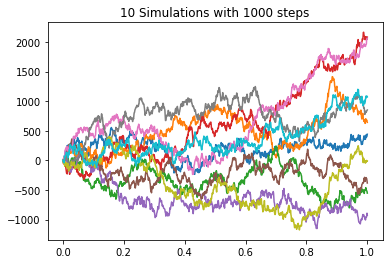

In [15]:
nb_simulations = 10

def plot_sim(nb_simulations,N,T,method):
    t = np.linspace(0,T,N+1)
    M = np.zeros([nb_simulations,N+1])
    for i in range(nb_simulations):
        M[i] = method(N,T)
        plt.plot(t,M[i])

        plt.title(str(nb_simulations) + " Simulations with " + str(N) + " steps")
    plt.show()

plot_sim(nb_simulations,N,T,brownian)

In [11]:
#Generate a random vector at the beginning

def brownian2(N,T):
    W = np.zeros(N+1)
    Delta = np.sqrt(T/N)
    Z = np.random.standard_normal(N)
    for i in range(1,N+1):
        W[i] = W[i-1] + Z[i-1]/Delta
    return W

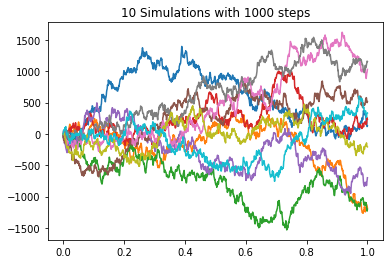

In [16]:
plot_sim(nb_simulations,N,T,brownian2)

## Normality test

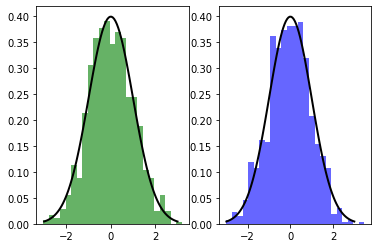

In [70]:
# two samples from method 1 and method 2
x = np.linspace(-3,3,100)
Z = np.random.standard_normal(1000)
Y = np.array([np.random.standard_normal() for i in range(1000)])
p = norm.pdf(x,0,1)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(Z,bins=25, density=True, alpha=0.6, color='g')
ax2.hist(Y,bins=25, density=True, alpha=0.6, color='b')
ax1.plot(x,p,linewidth=2,color='black')
ax2.plot(x,p,linewidth=2,color='black')
plt.show()

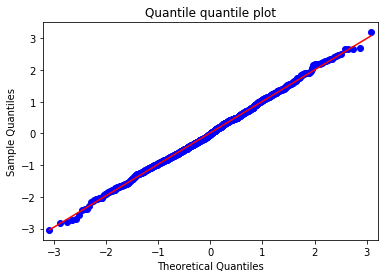

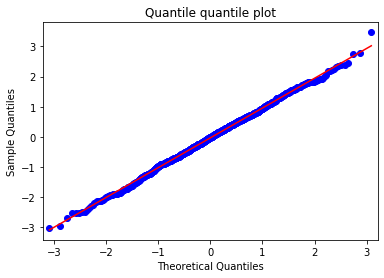

In [71]:
# qq plot
qqplot(Z, line='s')
plt.title("Quantile quantile plot")
plt.show()
qqplot(Y, line='s')
plt.title("Quantile quantile plot")
plt.show()

In [72]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(Z)
stat2, p2 = shapiro(Y)
print('Statistics=%.3f, p-val=%.3f' % (stat, p))
print('Statistics=%.3f, p-val=%.3f' % (stat2, p2))
# Confidence threshold
alpha = 0.05

if p < alpha:
    print(" HO is rejected for Z")
if p2 < alpha:
    print(" HO is rejected for Y")  

Statistics=0.998, p-val=0.440
Statistics=0.999, p-val=0.686


In [78]:
#Anderson-Darling test
from scipy.stats import anderson

result = anderson(Z)
result2 = anderson(Y)
print('Statistic Z: ',result.statistic,'Statistic Y: ',result2.statistic)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
        
print("-----")
for i in range(len(result2.critical_values)):
    sl, cv = result2.significance_level[i], result2.critical_values[i]
    if result2.statistic < result2.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic Z:  0.5269802818182825 Statistic Y:  0.28984095807936683
15.000: 0.574, data looks normal (fail to reject H0)
10.000: 0.653, data looks normal (fail to reject H0)
5.000: 0.784, data looks normal (fail to reject H0)
2.500: 0.914, data looks normal (fail to reject H0)
1.000: 1.088, data looks normal (fail to reject H0)
-----
15.000: 0.574, data looks normal (fail to reject H0)
10.000: 0.653, data looks normal (fail to reject H0)
5.000: 0.784, data looks normal (fail to reject H0)
2.500: 0.914, data looks normal (fail to reject H0)
1.000: 1.088, data looks normal (fail to reject H0)
